Handwiting recognition using Neural Network - Multiclass Classification

In [1]:
# Import libraries and packages 

In [2]:
# pandas,numpy,matplotlib ,Tensorflow,keras

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [4]:
# Reading the data from keras itself as dataset is already present 

In [5]:
# Reading both the training and testing data 

In [6]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
# Checking shape of X_train,y_train ,X_test,y_test

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
y_train.shape

(60000,)

In [10]:
X_test.shape

(10000, 28, 28)

In [11]:
y_test.shape

(10000,)

In [12]:
# Checking 1st record in X_train shape and X_train

In [13]:
X_train[0].shape

(28, 28)

In [14]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [17]:
# Plotting data to get the image and checking for 1st record of X_train

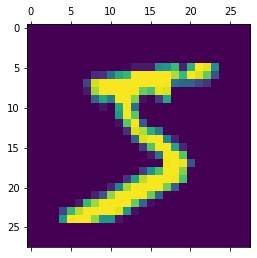

In [18]:
plt.matshow(X_train[0])

In [19]:
# Checking corresponding y_train (label)

In [20]:
y_train[0]

5

In [21]:
# Will try to reshape X_train and X_test as we can convert from 2D to 1D 

In [22]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [23]:
X_train_flattened.shape

(60000, 784)

In [24]:
X_test_flattened.shape

(10000, 784)

In [27]:
# As it is an image pixels are lying between 0 and 255 .We need to perform scaling so while model building we can get stable and better results 

In [28]:
X_train = X_train / 255
X_test = X_test / 255

In [29]:
X_train_flattened = X_train_flattened / 255
X_test_flattened = X_test_flattened / 255

In [ ]:
# After scaling values will lie between 0 and 1 

In [30]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [31]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [32]:
# Start building different Neural Network Model 

In [33]:
# Building simple Neural Network with No Hidden layers 

In [ ]:
# Using activation function - softmax as it is multiclass classification ,optimizer = adam, loss = sparse_categorical_crossentropy as it is multiclass classification

In [34]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4670 - accuracy: 0.8788
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3037 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2831 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2732 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2665 - accuracy: 0.9252


In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2689 - accuracy: 0.9255


[0.2689293324947357, 0.9254999756813049]

In [38]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 1ms/step


array([5.1502439e-06, 7.1070268e-11, 1.0894970e-05, 3.7373966e-03,
       4.1442908e-07, 2.8997141e-05, 4.8203547e-10, 9.9586529e-01,
       2.4907269e-05, 3.2692112e-04], dtype=float32)

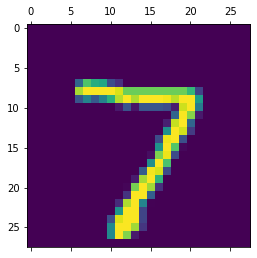

In [39]:
plt.matshow(X_test[0])

In [40]:
# np.argmax finds a maximum element from an array and returns the index of it

In [41]:
np.argmax(y_predicted[0])

7

In [42]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [43]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [44]:
# checking confusion matrix 

In [45]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    4,    6,    2,    1,    0],
       [   0, 1117,    2,    2,    0,    1,    4,    2,    7,    0],
       [   8,   13,  911,   18,    7,    4,   13,   10,   44,    4],
       [   4,    0,   16,  924,    0,   24,    4,   10,   20,    8],
       [   1,    1,    3,    1,  919,    0,   13,    3,   10,   31],
       [  11,    3,    2,   33,    9,  777,   17,    5,   29,    6],
       [  12,    3,    4,    1,    7,   11,  916,    2,    2,    0],
       [   1,    7,   22,    8,    8,    0,    0,  946,    5,   31],
       [   8,   10,    6,   21,    9,   28,   10,   11,  865,    6],
       [  11,    7,    1,   11,   29,    8,    0,   20,    6,  916]],
      dtype=int32)>

In [46]:
# Importing seaborn library to plot confusion matrix

Text(69.0, 0.5, 'Truth')

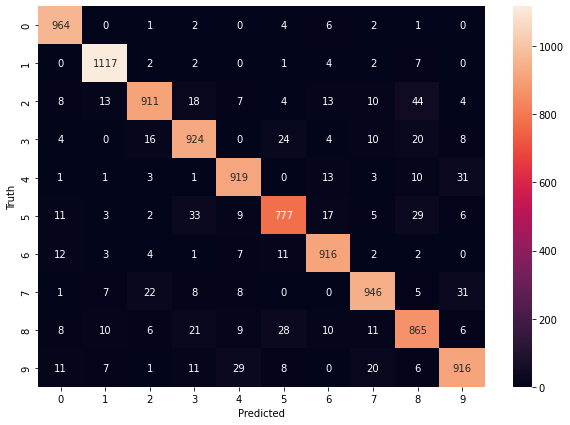

In [47]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [37]:
# As it is giving accuracy of 92.54% and expected is around 97% we can try adding hidden layers and check accuracy 

In [48]:
# Building Neural Network adding hidden layer 

In [49]:
# Using activation function at output - softmax as it is multiclass classification,activation function as Relu in hidden layer

In [ ]:
# optimizer = adam, loss = sparse_categorical_crossentropy as it is multiclass classification

In [51]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2685 - accuracy: 0.9235
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1224 - accuracy: 0.9634
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0844 - accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0648 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0489 - accuracy: 0.9852


In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0797 - accuracy: 0.9750


[0.07968788594007492, 0.9750000238418579]

313/313 [==============================] - 1s 2ms/step


Text(69.0, 0.5, 'Truth')

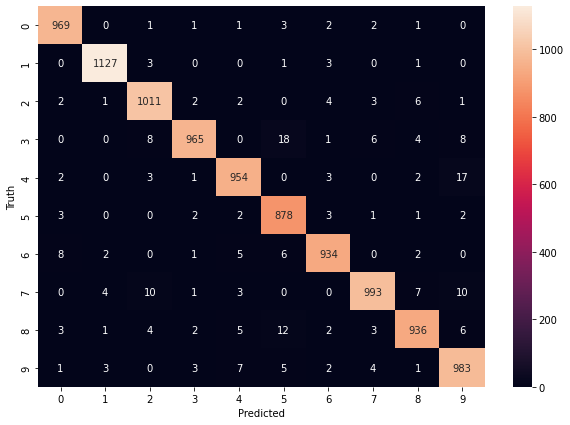

In [54]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [56]:
# Adding hidden layer improves accuracy of test above 97% and total parameters used is only 79510

In [57]:
# In order to further improve the accuracy or model performance we can try different hyperparameter tuning but as of now model is performing much better 